# School of Mathematics and Statistics, University of Sydney
# MATH3X76/4076 Mathematical Computing
## Lab 4 - Plotting, Interpolation (Solutions)

These labs are developed partially based on content from S. Roberts, G. Chandler, J. Thomson, L. Stals, K. Duru and G. Vasil.

This lab will introduce the main Python package for plotting, matplotlib, and we will then investigate interpolation methods.

### 4.1 Basic Plotting

The standard module for creating graphs in Python is `matplotlib` (this also comes pre-installed with Anaconda). This module has lots of functionality (see https://matplotlib.org/3.1.1/gallery/index.html), but we will use the `pyplot` sub-module for generating simple plots. This is usually imported with the `plt` abbreviation, so for the rest of the lab we will assume you have run:

In [1]:
import matplotlib.pyplot as plt
import numpy as np  # we will also be using NumPy

Suppose we want to plot some data points (e.g. from an experiment):

$x_k = 0.5, 0.7, 0.9, 1.3, 1.7, 1.8$

$y_k = 0.1, 0.2, 0.75, 1.5, 2.1, 2.4$

First, we need to store our data in NumPy vectors:

In [2]:
x = np.array([0.5, 0.7, 0.9, 1.3, 1.7, 1.8])
y = np.array([0.1, 0.2, 0.75, 1.5, 2.1, 2.4])

We can then generate a plot of $x_k$ versus $y_k$ with the following commands:

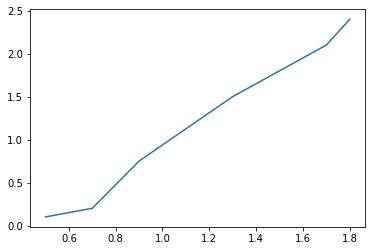

In [3]:
plt.figure()   # create a new figure
plt.clf()      # clear any existing plots ('clf' = 'clear figure')
plt.plot(x, y) # generate the plot
plt.show()     # view the plot

For data like this, the default plot is not very useful: we can't see how many data points we have, and the lines between them don't have much meaning. Fortunately, the `plt.plot` function has many different formatting options. For example,

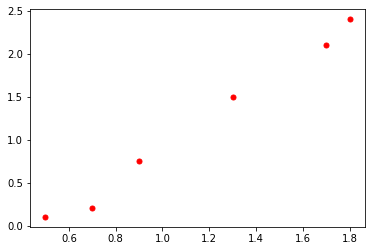

In [4]:
plt.figure()
plt.clf()
plt.plot(x, y, 'r.', markersize=10) # generate alternative plot
plt.show()

The 3rd input to `plot` is a string with formatting information: make the plot red, and mark each point with a dot (rather than join with lines). The last argument says how large to make the dots. For a full list of the format string options, see the 'Notes' section of https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html

Instead of using a format string, you can give yourself full control over the plot formatting by using keyword arguments. For example,

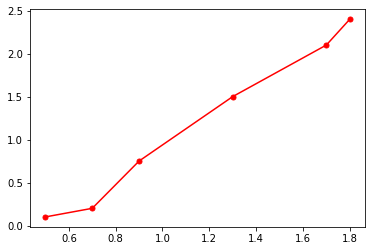

In [5]:
plt.figure()
plt.clf()
plt.plot(x, y, color='r', linestyle='-', linewidth=1.5, marker='.', markersize=10)
plt.show()

A full list of possibilities for line and marker styles is in the `plt.plot` documentation above. See https://matplotlib.org/stable/gallery/color/named_colors.html to see the different colour options.

**Exercise 1: Plot the above data with the points shown as green squares and with a dashed line.**

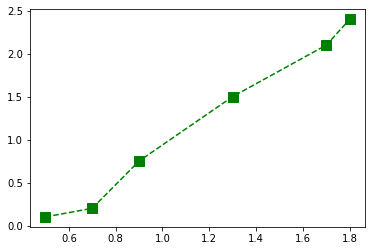

In [6]:
plt.figure()
plt.clf()
plt.plot(x, y, color='g', linestyle='--', linewidth=1.5, marker='s', markersize=10)
plt.show()

**Warning!** When making plots to be used in documents, I recommend using `linewidth` at least 1.5 so that it shows up clearly. Yellow tends to be hard to see (and is basically invisible on projectors). You should generally try to design your plots so that they still look reasonable if printed in black and white. 

Also, about 1 in 12 men are colourblind (red/green the most common type). You should try to make your plots as accessible as possible.

### 4.2 Multiple Lines

It is very easy to plot multiple lines/datasets on the same graph. You just call the `plt.plot` function multiple times. In our case, since the data is almost linear, let’s try to draw a trendline. We could try to calculate a proper line of best fit, but for now we can just see that the line passing through $(0.5,0)$ and $(2,2.7)$ would give a good approximation to the data. We can plot our data and the trendline using:

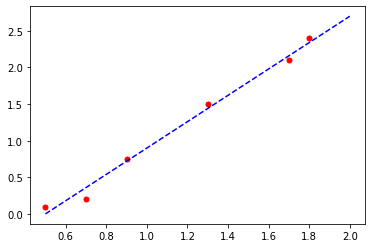

In [7]:
# Raw data
x = np.array([0.5, 0.7, 0.9, 1.3, 1.7, 1.8])
y = np.array([0.1, 0.2, 0.75, 1.5, 2.1, 2.4])

# Trend line
xtrend = np.array([0.5, 2.0])
ytrend = np.array([0.0, 2.7])

# Make plot
plt.figure()
plt.clf()
plt.plot(x, y, 'r.', markersize=10) # plot raw data with red dots
plt.plot(xtrend, ytrend, 'b--') # plot trend as blue dashed line
plt.show()

Of course, when we show multiple datasets on a single plot, we should include a legend. We can do this with

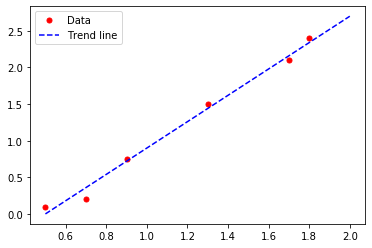

In [8]:
# Make plot with legend
plt.figure()
plt.clf()
plt.plot(x, y, 'r.', markersize=10, label='Data')
plt.plot(xtrend, ytrend, 'b--', label='Trend line')
plt.legend(loc='best') # display legend
plt.show()

We have to give a `label` to each dataset, and then add the `plt.legend` function to draw the legend. The `loc` option tells matplotlib where to put the legend: here, we ask matplotlib to put it wherever it thinks is best (but you can say things like `'upper left'` or `'lower right'` if you want to).

If for some reason you don't want something to appear in the legend, use `label='_nolegend_'` (with single underscores), but this should only be used in unusual circumstances.

### 4.3 Formatting

There are several more commands we can use to make our plot look nicer. We can add axis titles and a plot title with the commands

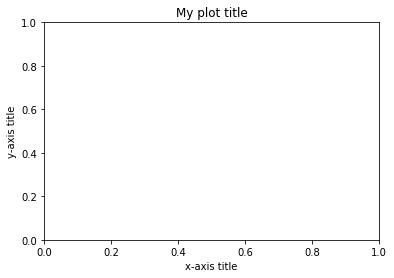

In [9]:
# Add plot titles
plt.xlabel('x-axis title')
plt.ylabel('y-axis title')
plt.title('My plot title')
plt.show()

and we can control the limits of the axes

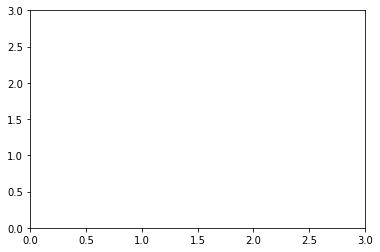

In [10]:
# Set axis limits
plt.xlim(0, 3) # lower and upper bounds for x-axis
plt.ylim(0, 3) # lower and upper bounds for y-axis
plt.show()

To let matplotlib automatically determine some (or all) of the bounds, use `None` instead of a number, like:

`plt.xlim(None, 3) # default lower bound, upper bound = 3 for x-axis`

To add gridlines, you run

`plt.grid()`

Of course, you have to run all of these commands before `plt.show()`, otherwise they won't appear!

**Exercise 2: Add reasonable plot titles, gridlines and set some axis limits to the trendline plot above.**

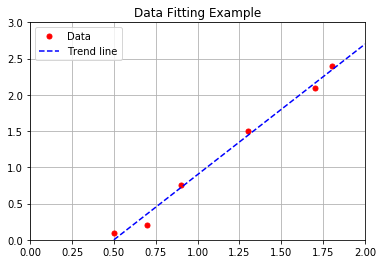

In [11]:
# Make plot with legend
plt.figure()
plt.clf()
plt.plot(x, y, 'r.', markersize=10, label='Data')
plt.plot(xtrend, ytrend, 'b--', label='Trend line')
plt.legend(loc='best') # display legend

# Add plot title, gridlines, set axis limits
plt.title('Data Fitting Example')
plt.grid()
plt.xlim(0, 2.0)
plt.ylim(0, 3.0)
plt.show()

### 4.4 Different Axis Types

In the previous example, it was easy to see the relationship between x and y from a basic plot. In more complicated situations, it may be necessary to use different scales to show the data more clearly. Consider the data

$n_k = 3, 5, 9, 17, 33, 65$

$s_k = 0.257, 0.0646, 0.0151, 3.96\times 10^{-3}, 9.78 \times 10^{-4}, 2.45 \times 10^{-4}$

A plot of $n_k$ versus $s_k$ shows no obvious trend:

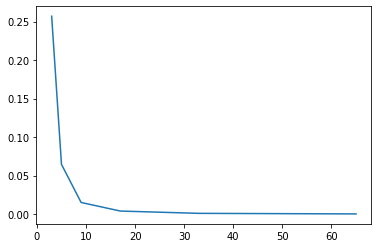

In [12]:
n = np.array([3, 5, 9, 17, 33, 65])
s = np.array([2.57e-1, 6.46e-2, 1.51e-2, 3.96e-3, 9.78e-4, 2.45e-4])
plt.figure()
plt.clf()
plt.plot(n, s)
plt.show()

However, if we put both axes on a log scale, things become much clearer:

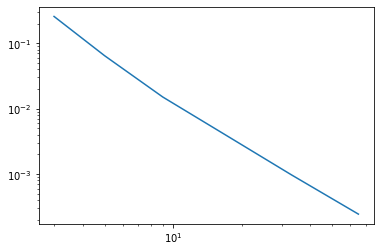

In [13]:
plt.figure()
plt.clf()
plt.loglog(n, s) # log scale for both axes
plt.show()

If we only want one axis to be logscale, we can use `plt.semilogx` (x-axis only in log scale) or `plt.semilogy` (y-axis only in log scale).

### 4.5 Graphing Functions

Another common task is to graph a mathematical function $f(x)$ on an interval $[a,b]$. We can do this by:

1. Creating a list of $x$ values between $a$ and $b$.
2. Evaluate $f$ at each of these $x$ values.
3. Plot the list of $x$ values and $f(x)$ values, connected by lines.

This does linear interpolation to our data, but if we have enough $x$ values it looks like a proper graph. This process is made easier by NumPy's `np.linspace` function (to create a vector of $x$ values) and the elementwise functions from the previous lab. 

For example, if we wanted to plot $f(x) = \frac{\sin(x)}{1+\sqrt{x}}$ on the interval $x \in [1,10]$, we could run:

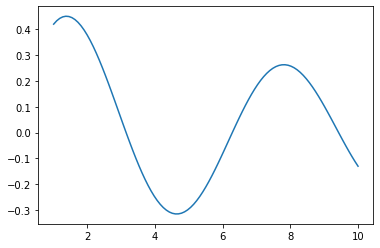

In [14]:
# Choose 101 equally-spaced x-values between 1 and 10
x = np.linspace(1, 10, 101)

# Evaluate f(x) at each x (using NumPy's element-wise functions rather than a for loop)
fx = np.sin(x) / (1 + np.sqrt(x))

# Plot x versus fx
plt.figure()
plt.clf()
plt.plot(x, fx)
plt.show()

**Exercise 3: Plot the graphs of $f(x) = 1/(1 + e^{ax})$ for $x \in [−4,4]$, where $a = 0.5,1,2$, all in one figure (with appropriate legends and axis ranges).**

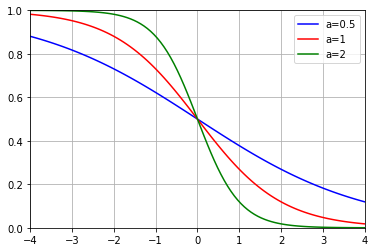

In [15]:
# Choose 101 equally-spaced x-values between 1 and 10
x = np.linspace(-4, 4, 101)

# Evaluate f(x) at each x
f1x = 1.0 / (1.0 + np.exp(0.5 * x))
f2x = 1.0 / (1.0 + np.exp(1.0 * x))
f3x = 1.0 / (1.0 + np.exp(2.0 * x))

# Plot x versus fx
plt.figure()
plt.clf()
plt.plot(x, f1x, 'b-', label='a=0.5')
plt.plot(x, f2x, 'r-', label='a=1')
plt.plot(x, f3x, 'g-', label='a=2')
plt.xlim(-4, 4)
plt.ylim(0, 1)
plt.grid()
plt.legend(loc='best')
plt.show()

### 4.6 Multiple Plots

Sometimes we want to plot different data on different plots, all within one figure. We can do this using the `plt.subplot` function.

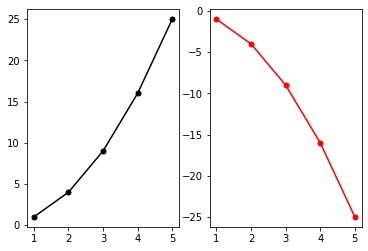

In [16]:
# Initialise an empty figure
plt.figure()
plt.clf()

# Create a grid of axes (1 row and 2 columns)
nrows = 1
ncols = 2

# Draw first subplot
plt.subplot(nrows, ncols, 1)
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'k.-', markersize=10)

# Draw second subplot
plt.subplot(nrows, ncols, 2)
plt.plot([1, 2, 3, 4, 5], [-1, -4, -9, -16, -25], 'r.-', markersize=10)

# Finished drawing all subplots
plt.show()

### 4.7 Saving Plots

To save a plot as an image file, replace the `plt.show()` command with `plt.savefig`, like in the below:

`plt.figure()`

`plt.clf()`

`plt.plot(x, y)`

`plt.savefig('myfigure.png')`

You can choose from a number of file types: I recommend `.png` for regular usage (including for Word documents or websites), and `.pdf` for formal documents written in LaTeX (e.g. honours or masters thesis). 

Sometimes the margins on the saved file can be very large, which doesn't look so nice. To save the plot with very narrow margins, use

`plt.savefig('myfigure.png', bbox_inches='tight')`

By default, the image is saved in the same directory as your workbook/code. 

In Jupyter specifically, you could instead just right-click on your figure and save directly.

### 4.8 Exercise: Data Plotting (MATH3976/4076 only)

For this exercise you will generate a plot of new COVID-19 cases in NSW. The file `lab4_nsw_covid_case_data.csv` is a text file containing the number of new COVID-19 cases reported in NSW from 9 March 2020 until 26 January 2023 inclusive (the first row is for 9 March, etc.). You can open the file in Excel or Notepad to inspect it.

(Based on data from https://data.nsw.gov.au/search/dataset/ds-nsw-ckan-3dc5dc39-40b4-4ee9-8ec6-2d862a916dcf/details?q=)

**Exercise 4: Read this data into a NumPy vector, and calculate a new vector which has the 7-day moving average of new cases. Make a plot showing both data series with appropriate legends/axis labels, etc.**

Notes:
- NumPy has functions to read data from text files: you will have to find a suitable choice and read the documentation to figure out how to use it.
- NumPy does not have a moving average function, you will have to write a function to do this yourself. The 7-day moving average is the average of the last 7 days’ of data (e.g. for the 7th date 15 March 2020, the number of new cases is 38 but the 7-day average is 18; for the last day 26 January 2023, there were 594 new cases but the 7-day average is 1046.7). The 7-day moving average is not defined for the first 6 days, so your vector will be shorter.
- For the plots, you can just use 0,1,2,...for the x-axis values (but be sure to use a suitable axis label). Make sure the moving average line is correctly aligned with the original data (i.e. no moving average is plotted for the first 6 days).

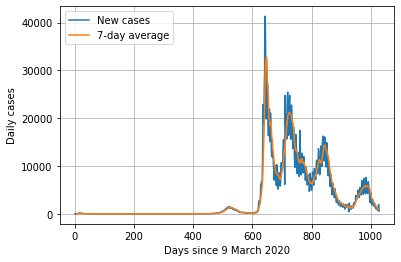

In [17]:
# Load data from file
data = np.loadtxt('lab4_nsw_covid_case_data.csv', dtype=int)

# Calculate 7-day moving average
ndata = len(data)
mvavg = np.zeros((ndata-6,), dtype=float)
for i in range(ndata-6):
    mvavg[i] = np.mean(data[i:i+7])

# Plotting
plt.figure()
plt.clf()
plt.plot(data, label='New cases')
plt.plot(np.arange(6, ndata), mvavg, label='7-day average') # note x-axis data
plt.grid()
plt.xlabel("Days since 9 March 2020")
plt.ylabel("Daily cases")
plt.legend(loc='upper left')
plt.show()

### 4.9 Basic Interpolation

In this section we will find an interpolating polynomial for a function. NumPy has several routines for manipulating polynomials, but here we will use the simplest one, `np.poly1d`. To represent the polynomial

$p_n(x) = a_0 + a_1 x + \cdots + a_n x^n,$

we provide `np.poly1d` with a vector of coefficients in *reverse* order (i.e. $[a_n ,a_{n−1}, \ldots , a_1, a_0]$). For example, to represent $p(x) = 4 − 3x + x^2$ we use

In [18]:
# Define vector of coefficients (in decreasing powers of x)
a = np.array([1.0, -3.0, 4.0])

# Build polynomial object
p = np.poly1d(a)

# Evaluate polynomial at x=12
print(p(12)) # can also input a vector of points to evaluate at

112.0


Given data $(x_0, y_0), \ldots, (x_n, y_n)$, we can find the coefficients $a_0, \ldots, a_n$ by solving the Vandermonde linear system from lectures.

**Exercise 5: (a) Implement a function `polyfit_vandermonde` which takes in a vector of $x$-values $(x_0, \ldots, x_n)$ and $y$-values $(y_0, \ldots, y_n)$ and returns the corresponding interpolating polynomial as a NumPy polynomial object (i.e. you should have `return np.poly1d(a)` as the last line of the function). You should do this by solving the corresponding Vandermonde system. (b) Use your function to find the degree-10 polynomial interpolating $\sin(x)$ at $x = 0, 0.6, 1.2, \ldots, 6$. (c) Make a plot of your interpolant and $\sin(x)$ over $x \in [−2,9]$ and comment on the quality of the fit.**

**Warning!** When plotting a function and its interpolant, make sure your plot uses many $x$-values, including points which you did not use to construct the interpolant. Otherwise, it will appear as if your interpolant is always perfect!

In [19]:
def polyfit_vandermonde(xdata, ydata):
    """
    Given data (x0,y0), ..., (xn,yn),
    construct the unique interpolating polynomial by solving
    the Vandermonde linear system.
    """
    n = len(xdata) - 1
    if len(ydata) != n+1:
        print("xdata and ydata do not have the same length")
        return None # return a blank 'nothing' object
    # Build the Vandermonde matrix
    A = np.zeros((n+1,n+1))
    for i in range(n+1): # i=0,1,...,n (inclusive)
        A[:,n-i] = xdata**i # WARNING - in lectures, have A[:,i], this flip is because of the np.poly1d convention
    # Solve the linear system
    a = np.linalg.solve(A, ydata)
    return np.poly1d(a)

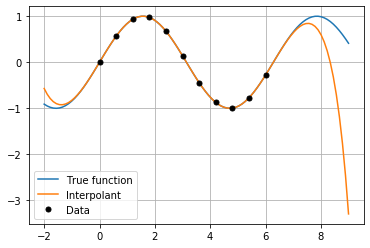

In [20]:
xs = np.linspace(0, 6, 11)
ys = np.sin(xs)
p = polyfit_vandermonde(xs, ys)

xs_full = np.linspace(-2, 9, 101) # many x values

plt.figure()
plt.clf()
plt.plot(xs_full, np.sin(xs_full), label='True function')
plt.plot(xs_full, p(xs_full), label='Interpolant')
plt.plot(xs, ys, 'k.', markersize=10, label='Data')
plt.grid()
plt.legend(loc='best')
plt.show()

# Clearly our interpolant matches the given data at the interpolation nodes
# In the 'interpolation' regime 0 <= x <= 6, the interpolant matches the true function very well
# In the 'extrapolation' regime, the interpolant starts to diverge the further away from [0,6] that we get

### 4.10 Interpolation with SciPy

As described in the lectures, there are other ways to construct the same interpolating polynomial without solving the Vandermonde linear system: other approaches have better numerical stability and make it easier to update our polynomial with new nodes or data.

SciPy is a very common Python package for mathematical computing, with lots of functions for linear algebra, signal proceessing, optimisation and more. For example, the `scipy.interpolate` module gives us an easy way to construct the interpolating polynomial in the Barycentric form:

$p_n(x) = \frac{\sum_{i=0}^{n} w_i y_i / (x-x_i)}{\sum_{i=0}^{n} w_i / (x-x_i)},$

where

$w_i = \frac{1}{(x_i-x_0)(x_i-x_1)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots (x_i-x_n)}$, for $i=0,\ldots,n$.

Given a function $f(x)$ which uses NumPy element-wise functions, we can interpolate $f(x)$ at equally spaced points with:

In [21]:
import scipy.interpolate as interpolate

# Select interpolation nodes
x = np.linspace(-1, 1, 6) # equally spaced nodes
fx = np.sin(x) # evaluate f at each interpolation node, here using f(x)=sin(x)

# Build interpolant for data (x, fx)
# p is a function for our interpolating polynomial; call it with p(x)
p = interpolate.BarycentricInterpolator(x, fx)

**Exercise 6: Using 11 equally spaced nodes in $[−1,1]$, find the polynomial interpolant for Runge's function $f(x)=\frac{1}{1+25x^2}$. Make a graph of the true $f(x)$ and the interpolant $p(x)$ and comment on what you see.**

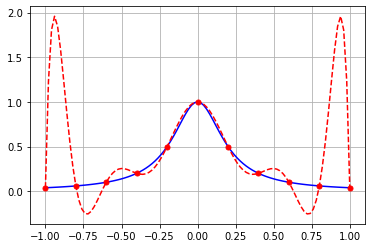

In [22]:
def runge(x):
    return 1.0 / (1 + 25*x**2)

# Select interpolation points and build interpolant
xs = np.linspace(-1, 1, 11)
ys = runge(xs)
p = interpolate.BarycentricInterpolator(xs, ys)

# Data for plotting
xfull = np.linspace(-1, 1, 101)
fs = runge(xfull)
ps = p(xfull)

plt.figure()
plt.clf()
plt.plot(xfull, fs, 'b-')
plt.plot(xfull, ps, 'r--')
plt.plot(xs, ys, 'r.', markersize=10)
plt.grid()
plt.show()

# As in the lectures, we see that our interpolant correctly matches f(x) at our 
# interpolation points and gives a good approximation near the centre of the interval.
# However, it displays the '‘'Runge phenomenon', where the polynomial interpolation 
# error is very large at the endpoints of the interpolation interval. This is the result 
# of a function whose higher derivatives are very large, and using a bad choice of interpolation points (equally-spaced).

We know that equally spaced points are not usually the best choice for polynomial interpolation. Instead, we should use Chebyshev points. The following function template can be used to calculate these points (you need to implement the calculation yourself):

In [23]:
def chebyshev_points(n):
    '''
    Returns a vector of the Chebyshev points for interpolation to polynomials of degree n
    The vector has length n+1.
    '''
    return np.cos((2*np.arange(n+1)+1)*np.pi / (2*n+2))  # COMPLETED IN EXERCISE 7

**Exercise 7: Repeat the above experiment using Chebyshev points (i.e. interpolate Runge's function at $n + 1$ Chebyshev points for $n = 10$). Plot the true $f(x)$ and your new interpolant $p(x)$ and compare to your previous result.**

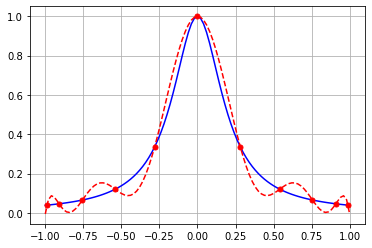

In [24]:
# Build interpolant
xs = chebyshev_points(10)
ys = runge(xs)
p = interpolate.BarycentricInterpolator(xs, ys)

# Plotting
xfull = np.linspace(-1, 1, 101)
fs = runge(xfull)
ps = p(xfull)

plt.figure()
plt.clf()
plt.plot(xfull, fs, 'b-')
plt.plot(xfull, ps, 'r--')
plt.plot(xs, ys, 'r.', markersize=10)
plt.grid()
plt.show()

# As in the lectures, we see that our interpolant correctly matches f(x) at our interpolation
# points and gives a good approximation near the centre of the interval.
# Now, compared to equally spaced points, our interpolation points are clustered at the 
# end-points of the interval (actually they are optimal) and we do not see the Runge phenomenon.

Instead, we could interpolate $f(x)$ using splines (piecewise continuous polynomials). Look at the documentation for `scipy.interpolate.CubicSpline` to see how to build a cubic spline interpolant.

**Exercise 8: Repeat the above experiment using 11 equally spaced points in $[−1,1]$ and a cubic spline with 'not-a-knot' extra conditions. Plot $f(x)$ and your new interpolant and compare to your result for polynomial interpolation with equally spaced points.**

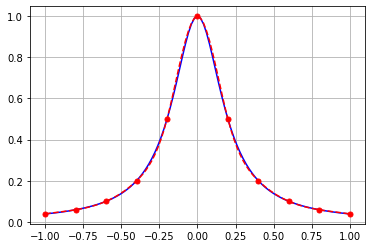

In [25]:
# Build cubic spine interpolant
xs = np.linspace(-1, 1, 11)
ys = runge(xs)
cs = interpolate.CubicSpline(xs, ys, bc_type='not-a-knot')

# Plotting
xfull = np.linspace(-1, 1, 101)
fs = runge(xfull)
ps = cs(xfull)

plt.figure()
plt.clf()
plt.plot(xfull, fs, 'b-')
plt.plot(xfull, ps, 'r--')
plt.plot(xs, ys, 'r.', markersize=10)
plt.grid()
plt.show()

# We now get an approximation that is good everywhere, even though we used equally spaced points.
# This matches the lectures, where the cubic spline interpolant error decreases based on the 
# largest gap between interpolation points, not based on the uneven error bounds in polynomial 
# interpolation (for which we needed to use Chebyshev points).

### 4.11 Multivariate Interpolation (MATH3976/4076 only)

There are several methods for interpolation to functions of multiple variables, including splines. Another common method is 'radial basis function' (RBF) interpolation. Given nodes $x_0, \ldots, x_n$ (these are vectors) and data $y_0, \ldots, y_n$, the RBF interpolant is given by

$RBF(x) = \sum_{i=0}^{n} w_i \phi(\|x-x_i\|).$

That is, our interpolant is a linear combination of basis functions which depend on how far away we are from each node (and the process of interpolation requires finding the weights $w_i$). There are many possible choices of the function $\phi$; a common example is the Gaussian function $\phi(r)=e^{-r^2}$. SciPy implements several multivariate interpolation methods, including RBFs.

In [26]:
# Make some example 2D data: zi = f(xi, yi)
x = np.array([0.0, 1.0, -1.0, -1.0, 1.0])
y = np.array([0.0, 1.0, -1.0, 1.0, -1.0])
z = x**2 + x*y + y**3 + 3

# Build an RBF interpolant z=RBF(x,y)
rbf = interpolate.Rbf(x, y, z, function='gaussian')

# Evaluate the RBF at a particular point
print(rbf(0.0, 0.0))

3.0


Try building RBFs using this data (or create your own). Evaluate the RBF at some points close to your interpolation nodes, some points between your interpolation nodes, and some points far away from your nodes. Have a look at the documentation of the `interpolate.Rbf` function and try other choices for $\phi(r)$. If you want, try to figure out how to generate 2D heatmap and 3D plots of 2D functions/data (matplotlib can do this with the `contourf` and `plot_surface` functions) and plot your data and different choices of interpolant.

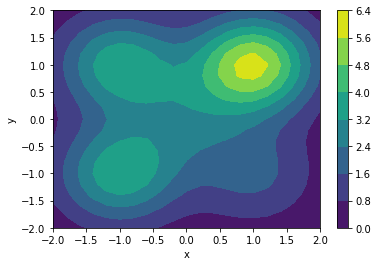

In [27]:
# This is really designed for experimentation by the students

# However, code for 2D heatmap plotting is
xs = np.linspace(-2, 2, 21)
ys = np.linspace(-2, 2, 21)
Xs, Ys = np.meshgrid(xs, ys)  # 2D arrays of all (Xs[i,j], Ys[i,j]) pairs
Zs = rbf(Xs, Ys)

plt.figure()
plt.clf()
cs = plt.contourf(Xs, Ys, Zs)  # return value is colour scale
plt.gcf().colorbar(cs)  # plt.gcf() is current figure, add 'cs' colour scale
plt.xlabel('x')
plt.ylabel('y')
plt.show()

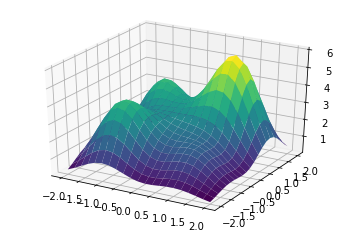

In [28]:
# The code for 3D surface plotting is
# (generate Xs, Ys, Zs as above, then...)

# We need to import a specific library for 3D axes
from mpl_toolkits import mplot3d

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xs, Ys, Zs, cmap='viridis')
plt.show()

# A good resource for 3D plotting is
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html